# import libraries and load data

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import joblib

In [ ]:
df = pd.read_excel('product_sales.xlsx')

# data check

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.699997,2,2871.000000,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,No Address,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.349998,5,2765.899902,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,No Address,Reims,No State,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.739998,2,3884.340088,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,No Address,Paris,No State,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.260002,6,3746.699951,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,No Address,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.000000,14,5205.270020,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,No Address,San Francisco,CA,No Code,USA,NaN,Brown,Julie,Medium


In [ ]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.000000,15,2244.399902,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",No Address,Madrid,No State,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.000000,1,3978.510010,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,No Address,Oulu,No State,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.000000,4,5417.569824,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",No Address,Madrid,No State,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.240002,1,2116.159912,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,No Address,Toulouse,No State,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.519997,9,3079.439941,2005-05-06,On Hold,2,5,2005,...,8616 Spinnaker Dr.,No Address,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.879999,1.000000,482.130005,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860001,3.000000,2203.430054,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.699997,6.000000,3184.800049,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.799805,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865107,NaN,1.203878,3.656633,0.69967,40.187912


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

# Exploratory Data Analysis

In [ ]:
# Total Sales Summary Metrics
print("Total Sales: ", df['SALES'].sum())
print("Average Sales: ", df['SALES'].mean())
print("Maximum Sales: ", df['SALES'].max())
print("Lowest Sales: ", df['SALES'].min())


Total Sales:  10032628.8493042
Average Sales:  3553.8890716628407
Maximum Sales:  14082.7998046875
Lowest Sales:  482.1300048828125


/tmp/ipython-input-27-3039702708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values,y=top_customers.index,palette='viridis')


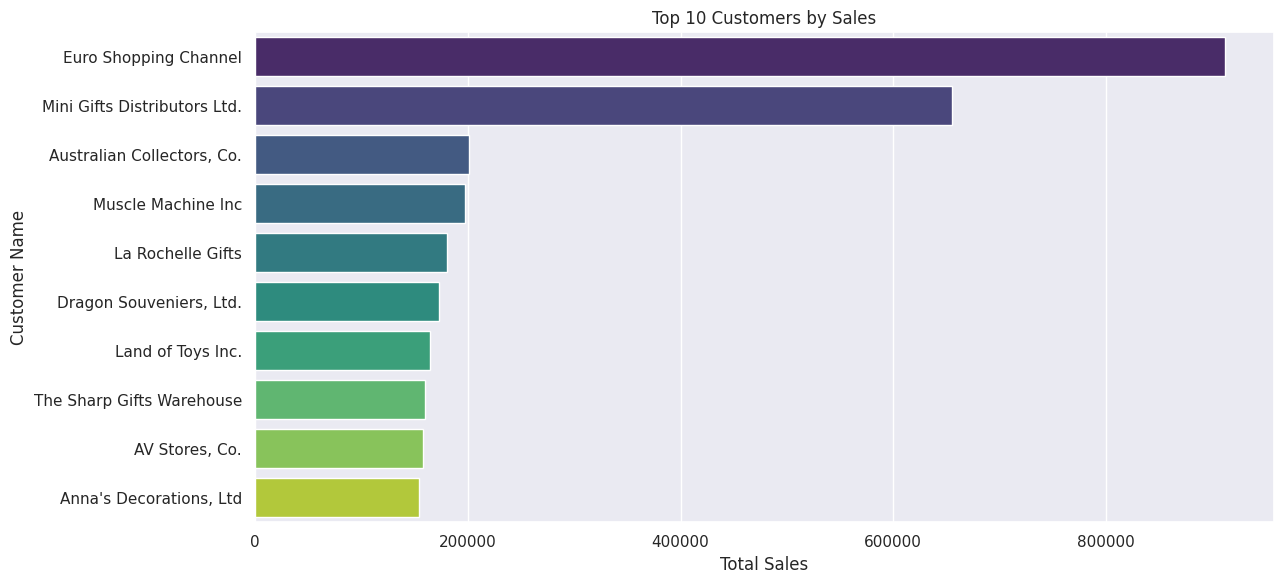

In [ ]:
# Top 10 Customers by Sales
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.values,y=top_customers.index,palette='viridis')
sns.set(rc={'figure.figsize':(13,6)})
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()


/tmp/ipython-input-30-2728384149.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="magma")


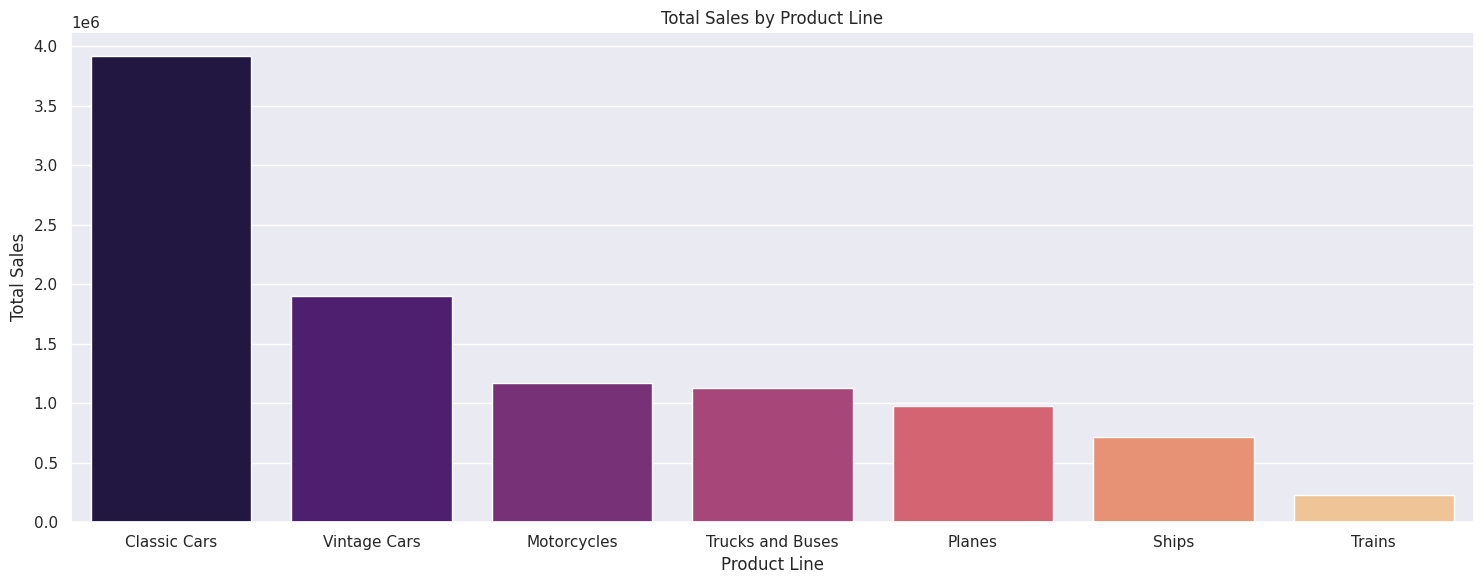

In [ ]:
# Sales by Productline
sales_by_product = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="magma")
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


In [ ]:
# Extract month and year for grouping
df['Month_Year'] = df['ORDERDATE'].dt.to_period('M')

/tmp/ipython-input-37-3845192817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='husl')


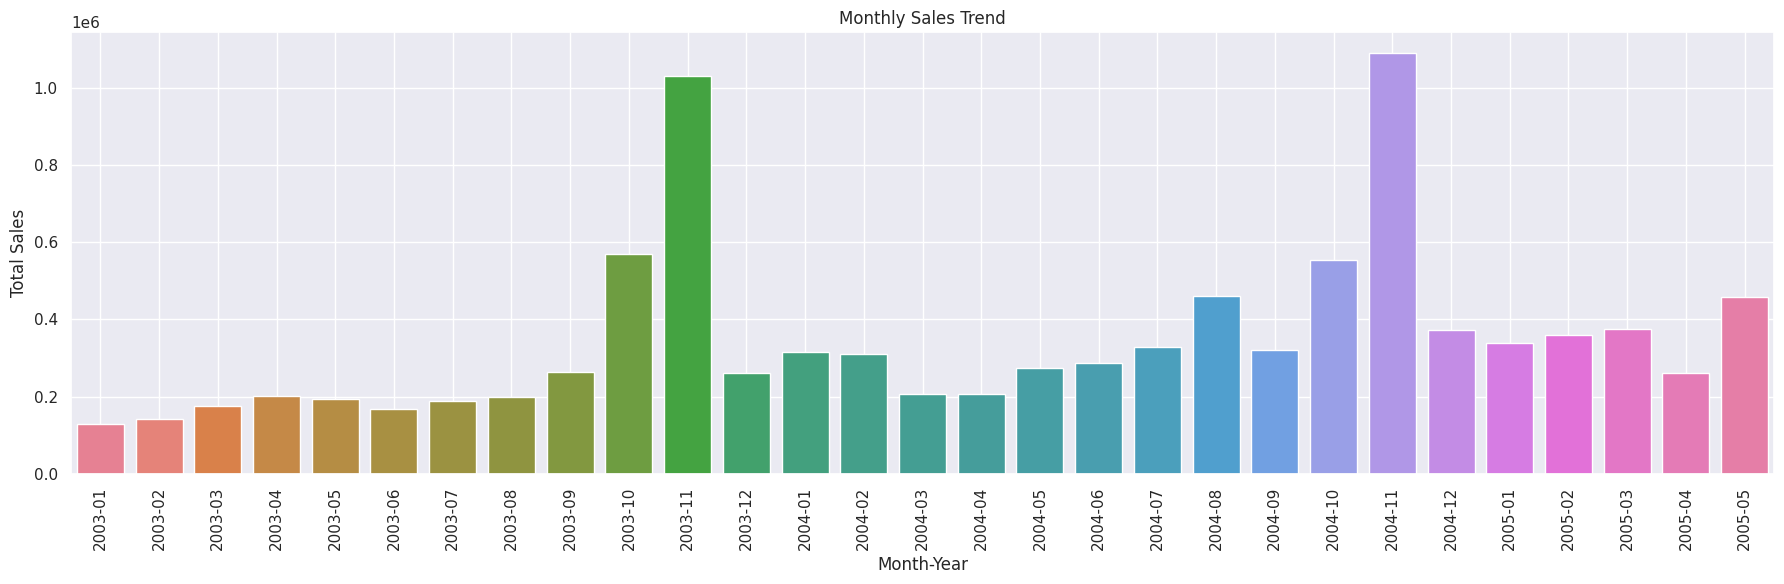

In [ ]:
# Group by Month-Year and sum sales
monthly_sales = df.groupby("Month_Year")["SALES"].sum()
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='husl')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-39-330935046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deal_sales.index, y=deal_sales.values, palette="Set2")


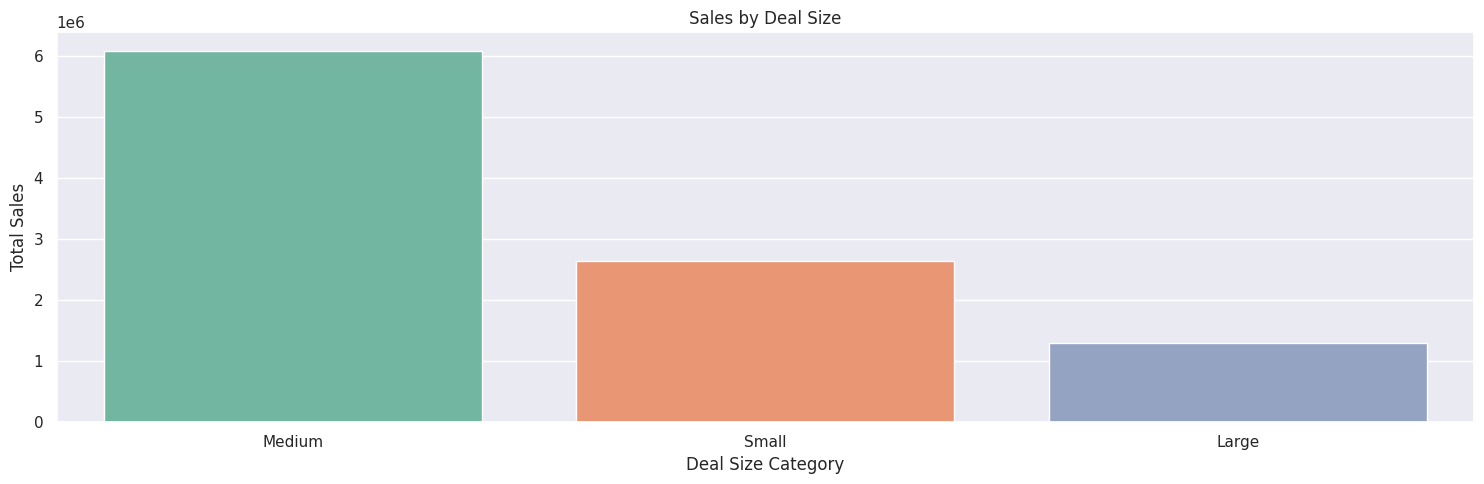

In [ ]:
#  Sales by Deal Size Category
deal_sales = df.groupby("DEALSIZE")["SALES"].sum().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=deal_sales.index, y=deal_sales.values, palette="Set2")
plt.title("Sales by Deal Size")
plt.xlabel("Deal Size Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


/tmp/ipython-input-40-2845408103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")


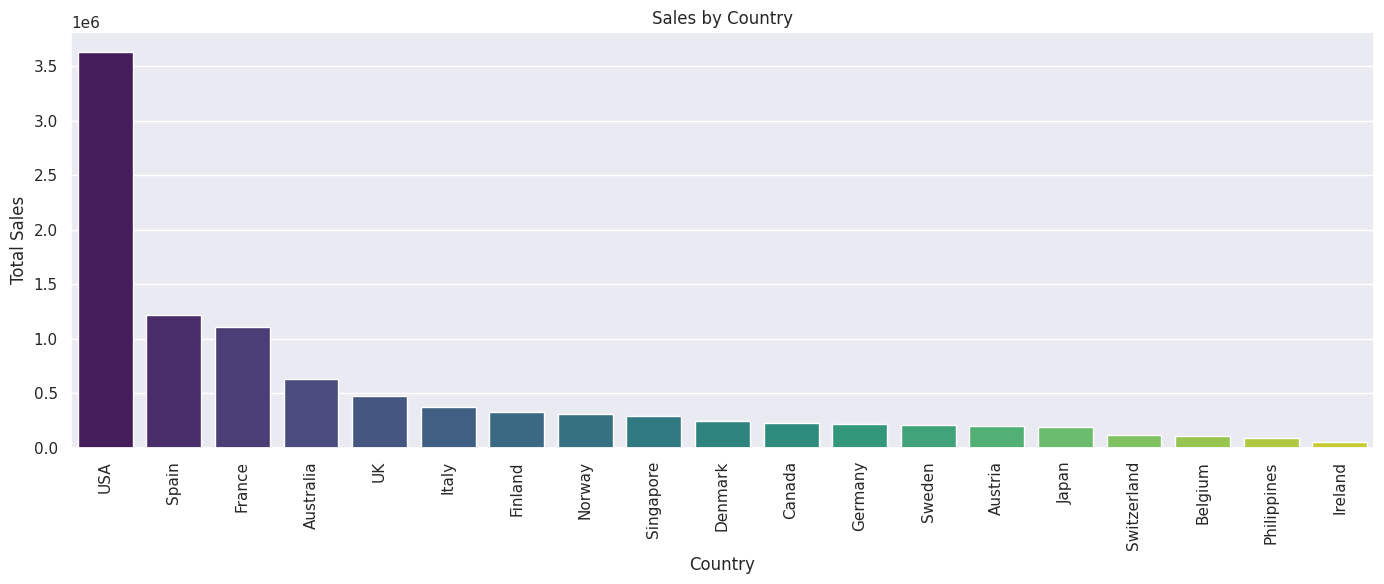

In [ ]:

# Grouping total sales by country
country_sales = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(14,6)})
sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


/tmp/ipython-input-41-1859745799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")


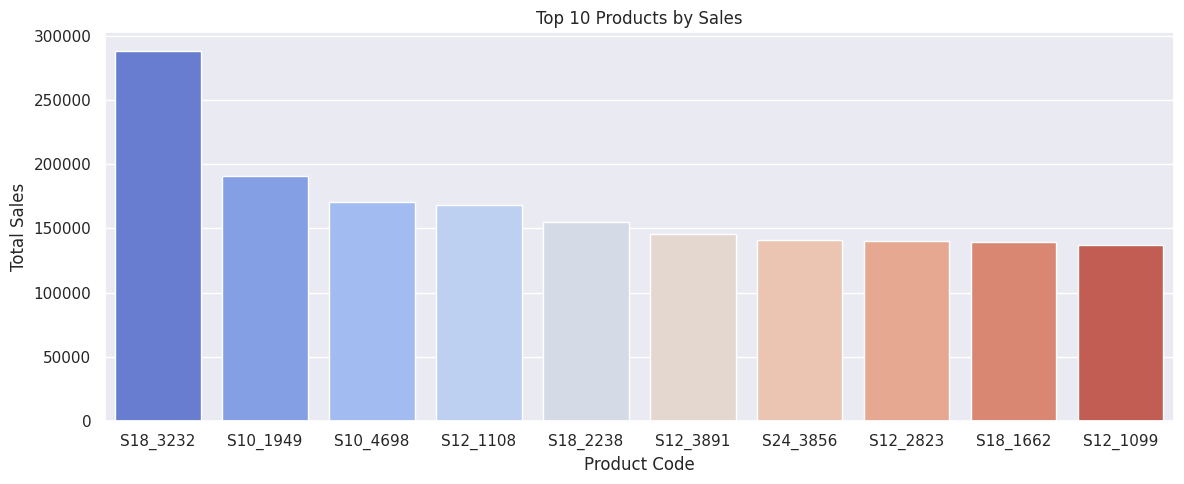

In [ ]:
# Group by product code and sum sales
top_products = df.groupby("PRODUCTCODE")["SALES"].sum().sort_values(ascending=False).head(10)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Code")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


# Feature Engineering

In [ ]:
# Profit (Estimated)
df['ESTIMATED_COST'] = df['QUANTITYORDERED'] * df['PRICEEACH'] * 0.7
df['PROFIT'] = df['SALES'] - df['ESTIMATED_COST']


In [ ]:
# High Value Customer Flag
df['HIGH_VALUE_CUSTOMER'] = df['SALES'].apply(lambda x: 1 if x > 10000 else 0)



In [ ]:
# Order Date Features

df['ORDER_YEAR'] = df['ORDERDATE'].dt.year
df['ORDER_MONTH'] = df['ORDERDATE'].dt.month
df['ORDER_DAY'] = df['ORDERDATE'].dt.day
df['ORDER_DAY_NAME'] = df['ORDERDATE'].dt.day_name()


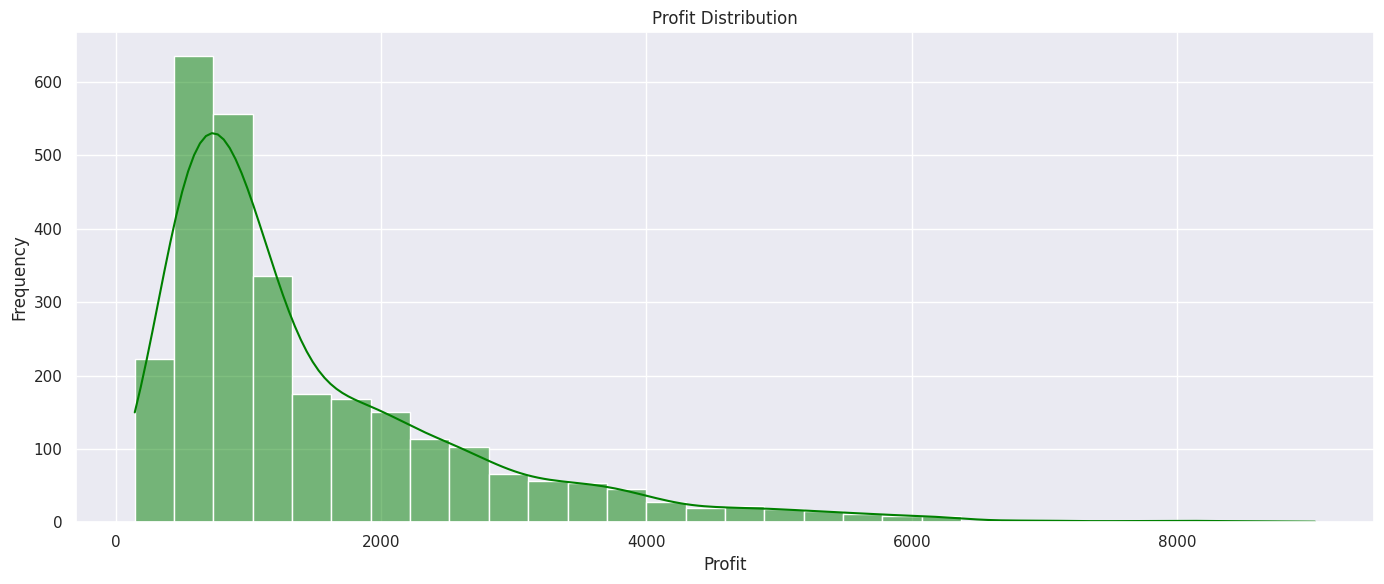

In [75]:
#  Profit Distribution (Overall Profit Spread)
sns.set(rc={'figure.figsize':(14,6)})
sns.histplot(df['PROFIT'], bins=30, kde=True, color='green')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


/tmp/ipython-input-67-3686695392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HIGH_VALUE_CUSTOMER',data=df, palette='husl')


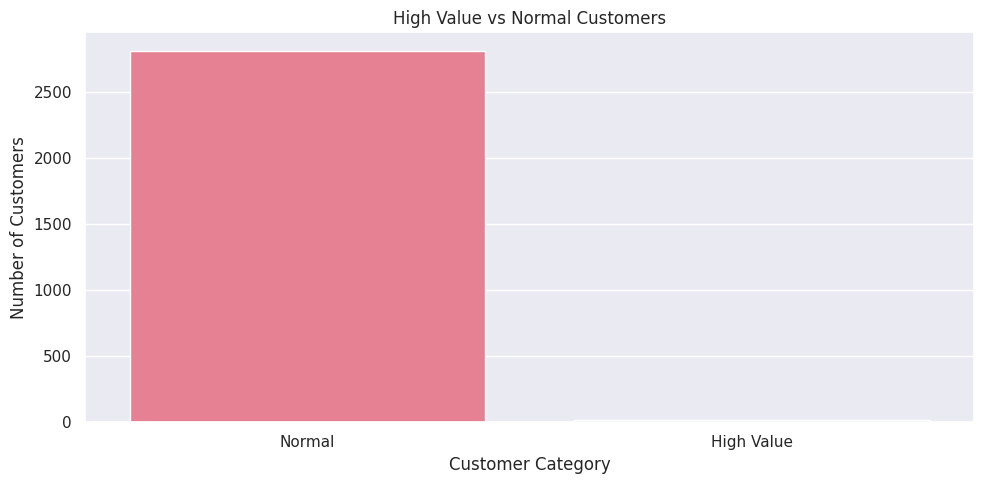

In [ ]:
# High Value vs Normal Customers Count
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='HIGH_VALUE_CUSTOMER',data=df, palette='husl')
plt.title("High Value vs Normal Customers")
plt.xticks([0,1],['Normal', 'High Value'])
plt.ylabel("Number of Customers")
plt.xlabel("Customer Category")
plt.tight_layout()
plt.show()


/tmp/ipython-input-53-1104759296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='dark')


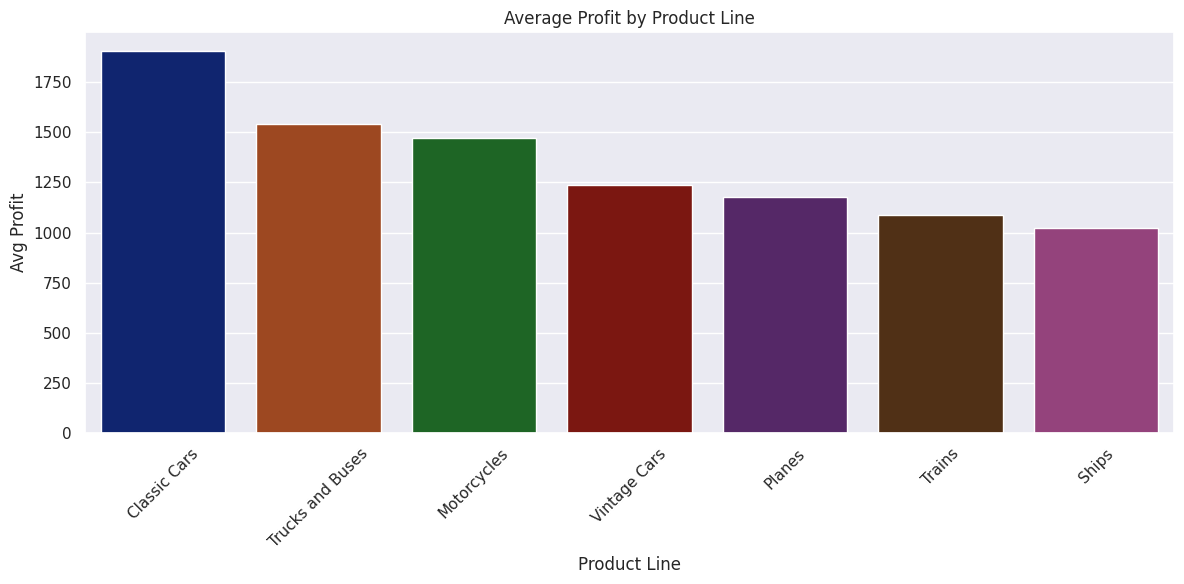

In [ ]:
# Average Profit by Product Line
avg_profit = df.groupby('PRODUCTLINE')['PROFIT'].mean().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='dark')
plt.title("Average Profit by Product Line")
plt.ylabel("Avg Profit")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


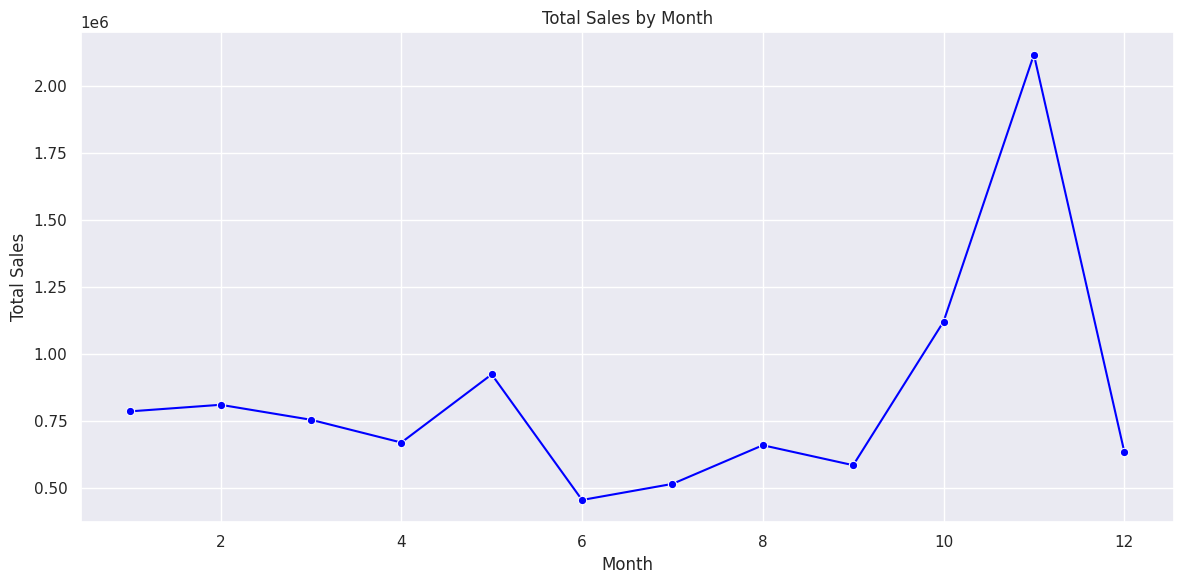

In [ ]:
#  Monthly Sales Trend (Sales by Month)
monthly_sales = df.groupby('ORDER_MONTH')['SALES'].sum()

sns.set(rc={'figure.figsize':(12,6)})
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='blue')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


/tmp/ipython-input-63-1759311551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='husl')


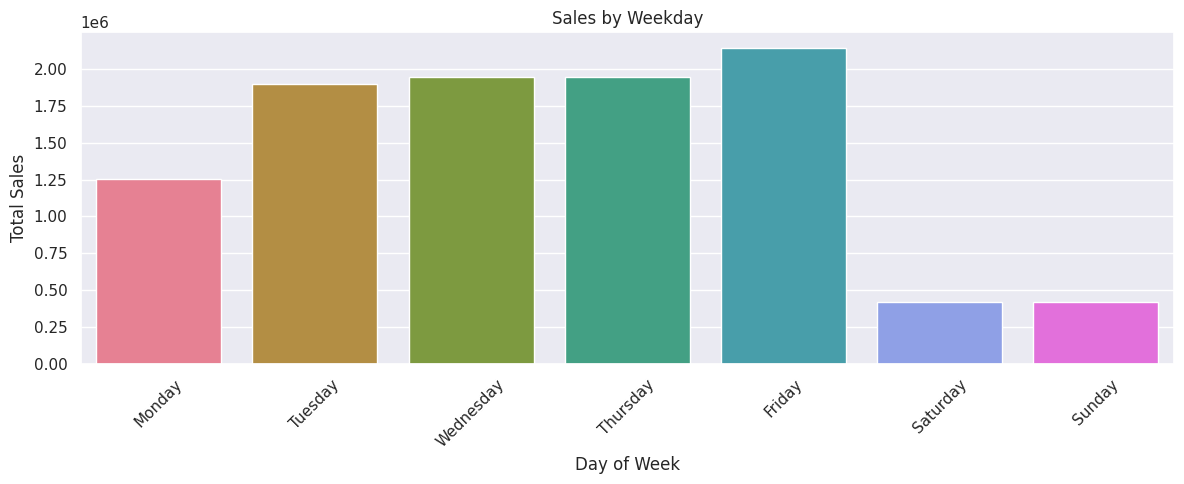

In [ ]:
# Weekday-wise Sales
weekday_sales = df.groupby('ORDER_DAY_NAME')['SALES'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='husl')
plt.title("Sales by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-65-2932803146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_profit.index, y=yearly_profit.values, palette='mako')


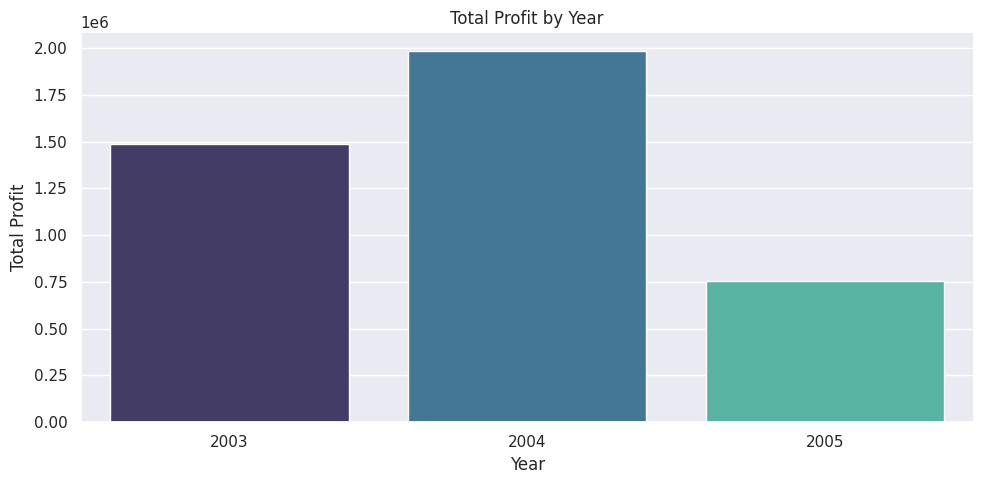

In [ ]:
#  Yearly Profit Trend
yearly_profit = df.groupby('ORDER_YEAR')['PROFIT'].sum()

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=yearly_profit.index, y=yearly_profit.values, palette='mako')
plt.title("Total Profit by Year")
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


# Basic Machine Learning
### We'll use Random Forest to predict High Value Customer (HIGH_VALUE_CUSTOMER) based on features like SALES, MSRP, PRODUCTLINE, etc.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Confusion Matrix:
[[555   0]
 [  0  10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       555
           1       1.00      1.00      1.00        10

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565



/tmp/ipython-input-74-925408257.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="dark")


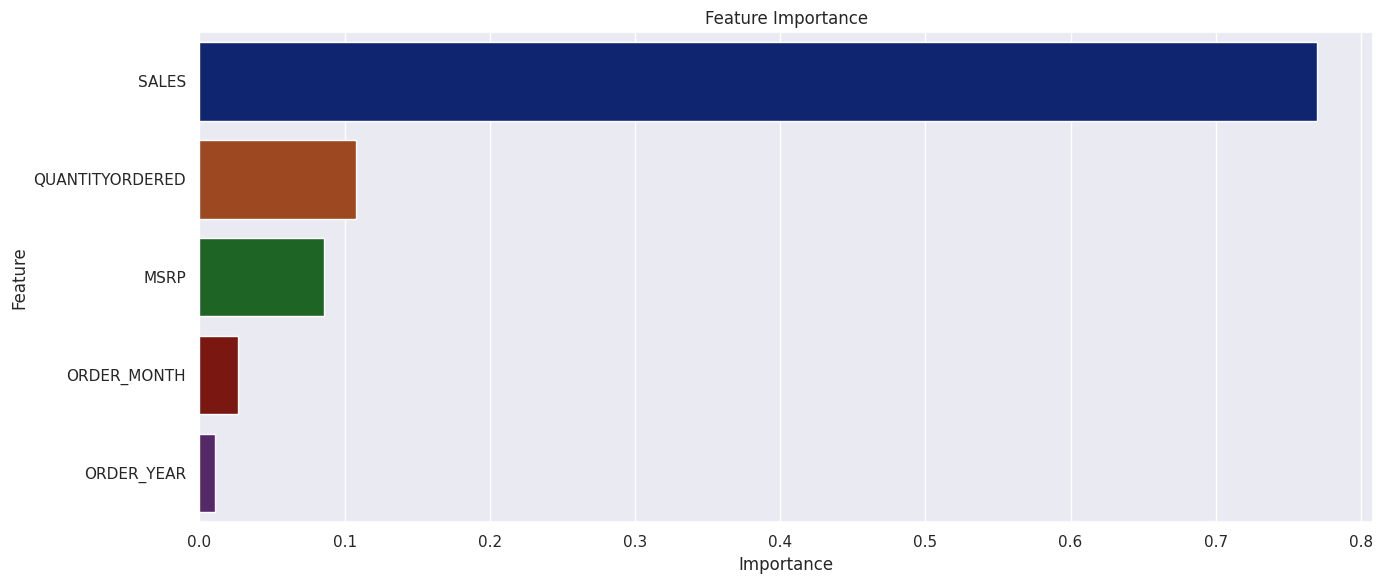

In [74]:
# Select features and target
features = ['SALES', 'MSRP', 'QUANTITYORDERED', 'ORDER_YEAR', 'ORDER_MONTH']
X = df[features]
y = df['HIGH_VALUE_CUSTOMER']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

sns.set(rc={'figure.figsize':(14,6)})
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="dark")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Note : We used a Random Forest Classifier to predict high-value customers using sales, quantity ordered, MSRP, and order date features. The model achieved 100% accuracy with no false predictions. Sales was identified as the most important factor in prediction. The model is performing exceptionally and can now be used for future decision-making or dashboard integration.